In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("C:/Users/Python/Desktop/machine learning/Vjezba 2/studenti.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   spol                 1008 non-null   object 
 1   nivo obrazovanja     1008 non-null   object 
 2   učenje sedmično [h]  998 non-null    float64
 3   aktivnost na času    998 non-null    object 
 4   broj bodova          998 non-null    float64
dtypes: float64(2), object(3)
memory usage: 39.5+ KB


In [4]:
df

,spol,nivo obrazovanja,učenje sedmično [h],aktivnost na času,broj bodova
0,Muško,srednja,2.0,niska,30.0
1,Muško,srednja,5.0,niska,42.0
2,Muško,srednja,1.0,niska,25.0
3,Žensko,srednja,14.0,visoka,98.0
4,Žensko,fakultet,3.0,niska,38.0
...,...,...,...,...,...
1003,Žensko,fakultet,5.0,niska,58.0
1004,Muško,fakultet,2.0,niska,28.0
1005,Muško,fakultet,14.0,niska,25.0
1006,Žensko,srednja,0.0,visoka,95.0


In [5]:
df.describe()

,učenje sedmično [h],broj bodova
count,998.000000,998.000000
mean,7.702405,60.398798
std,4.618941,25.141830
min,0.000000,20.000000
25%,4.000000,39.000000
50%,8.000000,61.000000
75%,12.000000,83.000000
max,15.000000,100.000000


In [7]:
df['aktivnost na času'].nunique()

3

In [8]:
df['spol'].nunique()

3

In [6]:
df['spol'].value_counts(normalize=True)

spol
Muško         0.502976
Žensko        0.495040
non-binary    0.001984
Name: proportion, dtype: float64

In [9]:
df[df['spol']=='non-binary']

,spol,nivo obrazovanja,učenje sedmično [h],aktivnost na času,broj bodova
999,non-binary,srednja,11.0,visoka,94.0
1007,non-binary,fakultet,15.0,niska,30.0


In [10]:
df.shape

(1008, 5)

In [11]:
df.drop([999,1007], inplace=True)

In [12]:
df.shape

(1006, 5)

In [13]:
df.isnull().sum()

spol                    0
nivo obrazovanja        0
učenje sedmično [h]    10
aktivnost na času      10
broj bodova            10
dtype: int64

In [14]:
df['učenje sedmično [h]'] = df['učenje sedmično [h]'].interpolate()
df['aktivnost na času'] = df['aktivnost na času'].bfill()
df['broj bodova'] = df['broj bodova'].interpolate()

In [15]:
df

,spol,nivo obrazovanja,učenje sedmično [h],aktivnost na času,broj bodova
0,Muško,srednja,2.0,niska,30.0
1,Muško,srednja,5.0,niska,42.0
2,Muško,srednja,1.0,niska,25.0
3,Žensko,srednja,14.0,visoka,98.0
4,Žensko,fakultet,3.0,niska,38.0
...,...,...,...,...,...
1002,Žensko,fakultet,4.0,niska,51.0
1003,Žensko,fakultet,5.0,niska,58.0
1004,Muško,fakultet,2.0,niska,28.0
1005,Muško,fakultet,14.0,niska,25.0


In [16]:
df.isnull().sum()

spol                   0
nivo obrazovanja       0
učenje sedmično [h]    0
aktivnost na času      0
broj bodova            0
dtype: int64

In [17]:
df.duplicated().sum()

np.int64(270)

In [18]:
df.drop_duplicates(inplace=True)

In [19]:
df.shape

(736, 5)

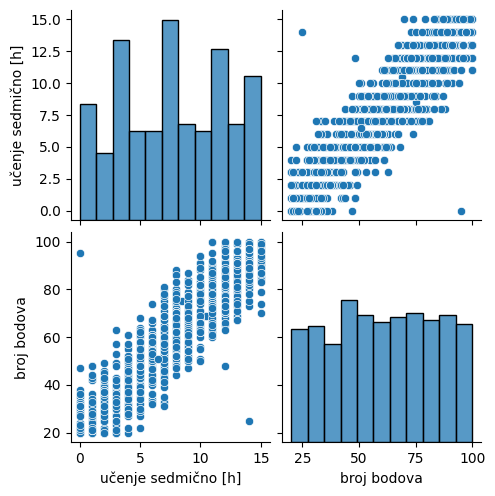

In [21]:
sns.pairplot(df)

In [22]:
df.columns

Index(['spol', 'nivo obrazovanja', 'učenje sedmično [h]', 'aktivnost na času',
       'broj bodova'],
      dtype='object')

In [24]:
df[['učenje sedmično [h]', 'broj bodova']].corr() 

,učenje sedmično [h],broj bodova
učenje sedmično [h],1.000000,0.888301
broj bodova,0.888301,1.000000


In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [26]:
df.head()

,spol,nivo obrazovanja,učenje sedmično [h],aktivnost na času,broj bodova
0,Muško,srednja,2.0,niska,30.0
1,Muško,srednja,5.0,niska,42.0
2,Muško,srednja,1.0,niska,25.0
3,Žensko,srednja,14.0,visoka,98.0
4,Žensko,fakultet,3.0,niska,38.0


In [30]:
X = df['učenje sedmično [h]'].values.reshape(-1,1)
y = df['broj bodova'].values

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [32]:
lr = LinearRegression()

In [33]:
lr.fit(X_train, y_train)

LinearRegression()

In [34]:
y_prediction = lr.predict(X_test)

In [35]:
score = r2_score(y_test, y_prediction)
print('r2 = ', score)

r2 =  0.7544224329273637


In [36]:
print('MSE= ', mean_squared_error(y_test, y_prediction))

MSE=  127.58579778750364


In [38]:
import shap

In [39]:
df.head()

,spol,nivo obrazovanja,učenje sedmično [h],aktivnost na času,broj bodova
0,Muško,srednja,2.0,niska,30.0
1,Muško,srednja,5.0,niska,42.0
2,Muško,srednja,1.0,niska,25.0
3,Žensko,srednja,14.0,visoka,98.0
4,Žensko,fakultet,3.0,niska,38.0


In [40]:
from sklearn.preprocessing import LabelEncoder

In [41]:
label_encoder = LabelEncoder()

In [42]:
df['spol'] = label_encoder.fit_transform(df['spol'])
df['nivo obrazovanja'] = label_encoder.fit_transform(df['nivo obrazovanja'])
df['aktivnost na času'] = label_encoder.fit_transform(df['aktivnost na času'])

In [43]:
df.head()

,spol,nivo obrazovanja,učenje sedmično [h],aktivnost na času,broj bodova
0,0,1,2.0,0,30.0
1,0,1,5.0,0,42.0
2,0,1,1.0,0,25.0
3,1,1,14.0,2,98.0
4,1,0,3.0,0,38.0


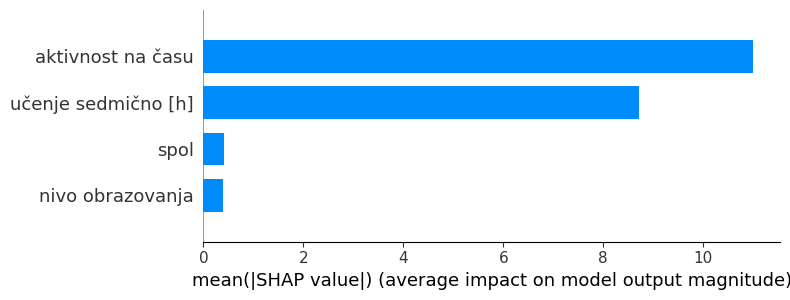

In [ ]:
# Učitavanje podataka

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Podjela podataka na trening i testni set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treniranje modela
model = LinearRegression()
model.fit(X_train, y_train)

#Inicijalizacija SHAP Explainer objekta
explainer = shap.Explainer(model.predict, X_test)

# Izračunavanje SHAP vrijednosti za test skup
shap_values = explainer(X_test)

# Vizualizacija prosječnog utjecaja svake karakteristike
shap.summary_plot(shap_values, X_test, plot_type="bar")
